In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rebound
import time

c1 = '#6666cc'
c2 = '#cc66cc'

%matplotlib inline

In [2]:
start = time.time()  # Tiempo de inicio

# Información inicial para que el código funcione

En la siguiente celda deben poner la información sobre la resonancia del objeto que analizarán.

Primero deben cambiar "indPlaneta" que corresponde al índice en la simulación del planeta que esté en resonancia
con el objeto que eligieron. Los índices son:
1. Mercurio
2. Venus
3. Tierra
4. Marte
5. Júpiter
6. Saturno
7. Urano
8. Neptuno

A "indObjeto" no lo muevan, le puse 9 porque es el que le corresponde en la simulación al "objeto en estudio".

Después cambien el número de periodos necesarios para observar la resonancia, por ejemplo: 

El objeto que quiero estudiar, Plutón, está en resonancia 2:3 con Neptuno (es decir, Plutón da 2 vueltas al Sol mientras Neptuno da 3). Por ello, en numObjeto pongo 2 (las vueltas que debe dar Plutón) y en numPlaneta pongo 3 (las que da Neptuno) para que el diagrama se vea completo. 
El código más adelante solito con esta información obtiene cuál es el tiempo ideal para la simulación :) 

In [3]:
"""Información sobre la resonancia"""

# Objeto a analizar 
Objeto = 'Pluto'

# Índices
indObjeto  = 9  # Objeto de estudio
indPlaneta = 8  # Planeta

# Número de periodos necesarios para observar la resonancia
numObjeto  = 2  # Objeto de estudio
numPlaneta = 3  # Planeta

De aquí en adelante el código funciona bien solito y no deben modificarlo (salvo que les de curiosidad hacer cambios, claro). 

# Inicializando la simulación

In [4]:
"""Inicializando la simulación"""

sim = rebound.Simulation()        # En "sim" alojaremos la info de la simulacion
sim.units = ('AU', 'yr', 'Msun')  # Unidades que queremos usar
sim.integrator = "ias15"          # Integrador de REBOUND

In [5]:
"""Cuerpos a incluir en la simulación"""

Sol = ['Sun']
sim.add(Sol)

Planetas = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
sim.add(Planetas)

sim.add(Objeto)

sim.move_to_com()

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'Pluto'... Found: Pluto Barycenter (9).


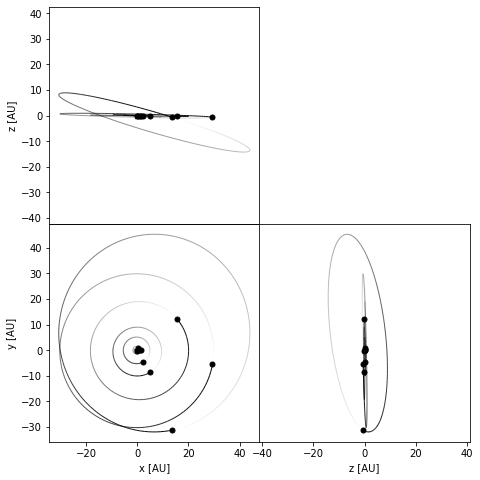

In [6]:
"""Gráfica con las órbitas"""

fig = rebound.OrbitPlot(sim, unitlabel="[AU]", slices=1)
plt.savefig('orbit.pdf',bbox_inches='tight');

El tiempo "ideal" de la simulación estará determinado por el valor máximo entre:
- El producto del periodo del planeta con el número de vueltas que da para que se vea la resonancia. 
- El producto del periodo del objeto con el número de vueltas que da para que se vea la resonancia. 

In [7]:
"""Determinación del tiempo de la simulación"""

periodoPlaneta = sim.particles[indPlaneta].P   # Periodo orbital del planeta
periodoObjeto  = sim.particles[9].P            # Periodo orbital del objeto
 
tSim = 10*np.maximum(numPlaneta*periodoPlaneta, numObjeto*periodoObjeto) # Tiempo de la simulación
N = 5000                                                              # Número de salidas
tiempos = np.linspace(0., tSim, N)                                    # Momentos en que generará las salidas

# Haciendo la simulación

In [8]:
"""Arreglos para almacenar la información"""

t = []

# Datos del Planeta
xPlaneta, yPlaneta, zPlaneta = [],[],[]  
inc, Omega, omega, M, Lambda = [],[],[],[],[]

# Datos del Objeto
xObjeto, yObjeto, zObjeto = [],[],[]                    

In [9]:
"""Haciendo la integración"""

for i,tiempo in enumerate(tiempos):
    
    sim.integrate(tiempo)
    t.append(tiempo)

    # Con este ciclo guardaremos la información de la posición
    j = 0
    for p in sim.particles:
        if j == indPlaneta:  # Posición del Planeta
            xPlaneta.append(p.x)
            yPlaneta.append(p.y)
            zPlaneta.append(p.z)
        if j == indObjeto:   # Posición del Objeto
            xObjeto.append(p.x)
            yObjeto.append(p.y)
            zObjeto.append(p.z)
        j = j + 1
    
    # Con este ciclo guardaremos los ángulos
    k = 1
    for o in sim.calculate_orbits():
        if k == indPlaneta:  # Ángulos del Planeta
            inc.append(o.inc)
            Omega.append(o.Omega)
            omega.append(o.omega)
            M.append(o.M)
            Lambda.append(o.l)
        k = k + 1

# Procesamiento de los datos

## Sin inclinación

In [10]:
"""Haciendo la rotación"""
xPlanetaRot, yPlanetaRot = [], []
xObjetoRot,  yObjetoRot  = [], []

i = 0
for i in range(0,len(Lambda)):
    
    # Calculando senos y cosenos
    
    cL = np.cos(Lambda[i])
    sL = np.sin(Lambda[i])
    
    # Haciendo la rotación
    
    x = xPlaneta[i]
    y = yPlaneta[i]
    
    xPlanetaRot.append(+ x * cL + y * sL)
    yPlanetaRot.append(- x * sL + y * cL)
    
    x = xObjeto[i]
    y = yObjeto[i]

    xObjetoRot.append(+ x * cL + y * sL)
    yObjetoRot.append(- x * sL + y * cL)

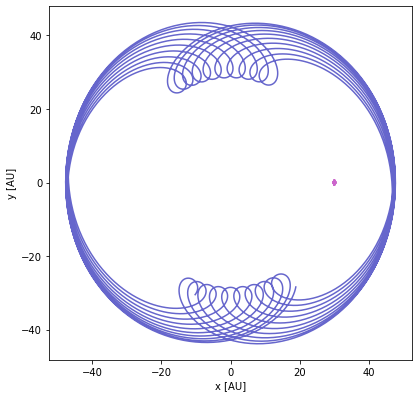

In [11]:
fig, ax = plt.subplots(figsize=(6.5,6.5))
ax.plot(xObjetoRot, yObjetoRot, color = c1)
ax.plot(xPlanetaRot, yPlanetaRot, color = c2)
ax.set_xlabel(r'x [AU]')
ax.set_ylabel(r'y [AU]')
plt.savefig('resonance.pdf',bbox_inches='tight');

## Tomando en cuenta la inclinación

In [12]:
"""Haciendo la rotación"""
xPlanetaRot, yPlanetaRot, zPlanetaRot = [], [], []
xObjetoRot,  yObjetoRot,  zObjetoRot  = [], [], []

i = 0
for i in range(0,len(Lambda)):
    
    # Calculando senos y cosenos
    
    cO = np.cos(Omega[i])
    sO = np.sin(Omega[i])
    
    cI = np.cos(inc[i])
    sI = np.sin(inc[i])

    cT = np.cos(omega[i] + M[i])
    sT = np.sin(omega[i] + M[i])
    
    # Haciendo la rotación
    
    x = xPlaneta[i]
    y = yPlaneta[i]
    z = zPlaneta[i]
    
    xPlanetaRot.append(+ x*(cO*cT - cI*sO*sT) + y*(sO*cT + cI*cO*sT) + z*(sI*sT))
    yPlanetaRot.append(- x*(cO*sT + cI*sO*cT) + y*(-sO*sT+ cI*cO*cT) + z*(sI*cT))
    zPlanetaRot.append(+ x*(sI*sO) - y*(sI*cO) + z*(cI))
    
    x = xObjeto[i]
    y = yObjeto[i]
    z = zObjeto[i]

    xObjetoRot.append(+ x*(cO*cT - cI*sO*sT) + y*(sO*cT + cI*cO*sT) + z*(sI*sT))
    yObjetoRot.append(- x*(cO*sT + cI*sO*cT) + y*(-sO*sT+ cI*cO*cT) + z*(sI*cT))
    zObjetoRot.append(+ x*(sI*sO) - y*(sI*cO) + z*(cI))

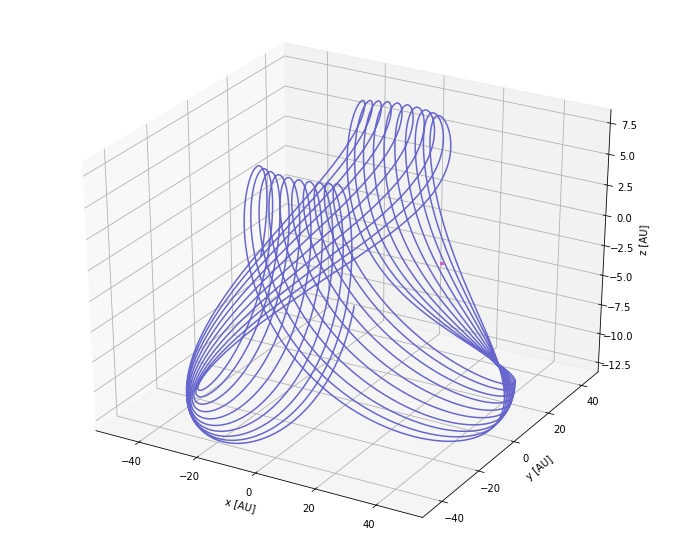

In [13]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot(xObjetoRot, yObjetoRot, zObjetoRot, color = c1)
ax.plot(xPlanetaRot, yPlanetaRot, zPlanetaRot, color = c2)

ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')

plt.savefig('resonance3D.pdf',bbox_inches='tight');

In [14]:
end = time.time()
segundos = end - start

print(segundos)   # Tiempo que tomó realizar esta simulación

152.66598105430603
